In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Load Dataset and mktgbudget sheet
df1 = pd.read_csv('./student_scores.csv')
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Show key statstics
df1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#Define x variables
x=df1['Hours'].values
y=df1['Scores'].values

#Load Library for Training dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Change Data to 2D array
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)
y_train2 = y_train.reshape(-1,1)
y_test2 = y_test.reshape(-1,1)


array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

Text(0, 0.5, 'Percentage Score')

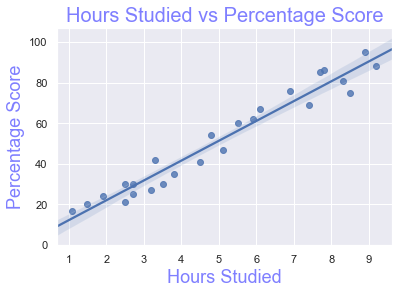

In [5]:
#Seaborn Graph
lmgraph=sns.regplot(x=x,y=y)
lmgraph.axes.set_title("Hours Studied vs Percentage Score",size=20,color='blue',alpha=0.5)
lmgraph.set_xlabel("Hours Studied",size=18,color='blue',alpha=0.5)
lmgraph.set_ylabel("Percentage Score",size=18,color='blue',alpha=0.5)

In [6]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

for name,method in [('Linear Regression', LinearRegression())]: 
    method.fit(x_train2,y_train2)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
print('\nCoefficient: {:0.2f}'.format((float(method.coef_))))
    
#MAE,MSE and RMSE

print('\nR2: {:0.2f}'.format(r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 1.99

Coefficient: 9.84

R2: 0.91
Mean Absolute Error: 4.14
Mean Squared Error: 20.64
Root Mean Squared Error: 4.54


In [7]:
#Forecast Table
predict2 = predict.reshape(-1)
diff = predict2-y_test
FcstTble=pd.DataFrame({'Actual':y_test,'Predicted':predict2.round(2),'Difference':diff.round(2)})
print('\nForecast Table')
FcstTble.head()


Forecast Table


,Actual,Predicted,Difference
0,25,28.55,3.55
1,35,39.36,4.36
2,42,34.45,-7.55
3,62,60.02,-1.98
4,20,16.74,-3.26
